# Tasks

In [24]:
# Imports.
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as pt
import seaborn as sns
import scipy as sp




## Task 1: Source the Data Set

Question: Import the Iris data set from the sklearn.datasets module.
Explain, in your own words, what the load_iris() function returns.

In [25]:
# Source the Iris dataset from sklearn.datasets
iris = load_iris()
print(type(iris))
print(iris)



<class 'sklearn.utils._bunch.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1

Question: Explain, in your own words, what the load_iris() function returns.

Answer: The load_iris() function returns a datatype called a Bunch. A bunch is a sub category of a Dictionary, the difference being that a bunch supports attribute-style access.
The fucntion is called through a library called sklearn, which is an open-source machine learning library that contains both algorithms that are useful for analysing data, and some classic datasets such as "Iris" and "Digits" that are frequently used in the teaching of data analysis. 
The dataset Iris is a classic dataset from Fisher et al., containing measurments/observations from field studies of 3 species of Iris flowering plants. It is frequently used as a first dataset for students to analyse because of its small size, at 150 rows of data, and bacause of its simple-to-understand structure, making the barrier to entry of understanding quite low and therefore more easily accessable for more students begining their data science learning journey. 

References: "https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html", "https://www.codecademy.com/resources/docs/sklearn " 

## Task 2: Explore the Data Structure

Question: Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.



In [26]:
df = pd.DataFrame(np.column_stack((iris.data, iris.target)), columns = iris.feature_names+['Species'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.rename(columns={'iris.target_names': 'Species_number'}, inplace=True)
pd.set_option('display.max_columns', None)

df.to_csv('iris.csv') #saves the iris dataframe to a csv file
#df.head(150) #shows only the first 150 rows
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Species    species  
0

The shape of the dataset is 5 columns x 150 rows. 
Each of the first 4 colunms contains a floating number, while the fifth column displays a string containing the name of the species of the flower.
The first 50 rows have the same information in the species string field, as do the second 50 and the last 50 respectively. 

references: "https://www.geeksforgeeks.org/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/ , https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html "

## Task 3: Summarize the Data

Question: For each feature in the dataset, calculate and display:
* mean
* minimum
* maximum
* standard deviation
* median

For this analysis, i am interperting the requiremnt as that each feature will be analysed on each species seperately. 

In [27]:
uniqueSpecies = df['species'].unique() #gets unique values from Column 'species', giving a non-repeating list of species types. 
#print(uniqueSpecies)

describe = df.groupby('species',observed=True)[iris.feature_names].describe() # This allows for a dataframe to be created , containing each feature to be analysed by species seperately. 
print(describe)
pd.set_option('display.max_columns', None)

describe.to_csv('describe.csv') #saves the describe dataframe to a csv file



           sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
species                                                                     
setosa                 50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
   

## Task 4: Visualize Features

Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

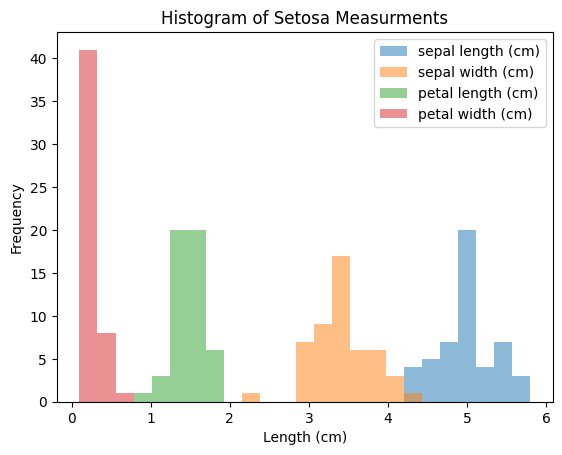

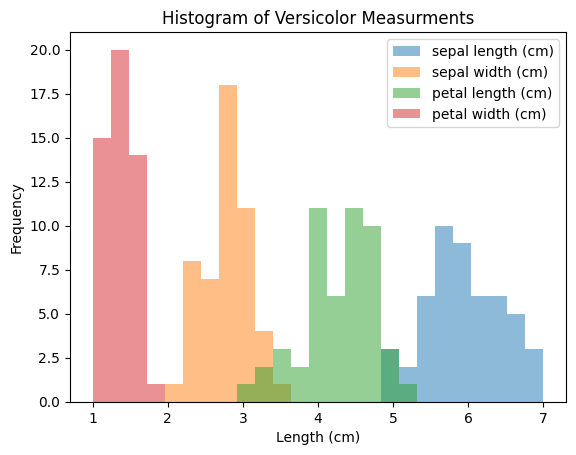

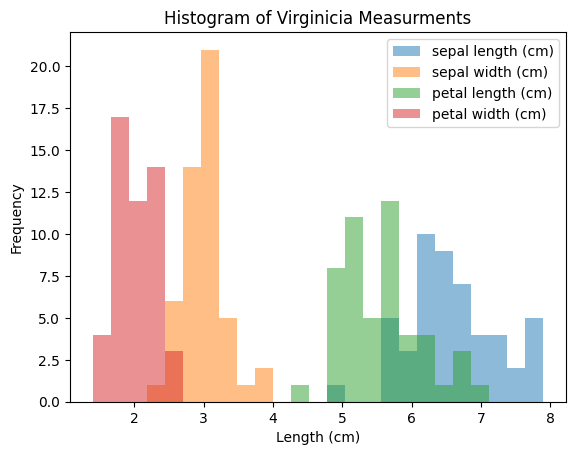

In [28]:
# split the main iris dataframe into three smaller dataframes to make calling individually simpler
df1 = df[df['species'] == uniqueSpecies[0]] #Setosa
df2 = df[df['species'] == uniqueSpecies[1]] #Versicolor
df3 = df[df['species'] == uniqueSpecies[2]] #Virginicia

df1 = df1.drop(columns='Species')
df2 = df2.drop(columns='Species')
df3 = df3.drop(columns='Species')
print (df1)
print (df1.shape)
#print (df2)
#print (df3)




# Histograms for Petal and Sepal length each species
ax1 = df1.plot(kind = 'hist', title ='Histogram of Setosa Measurments', alpha = 0.5, bins = 25, xlabel = 'Length (cm)', ylabel = 'Frequency')
ax2 = df2.plot(kind = 'hist', title ='Histogram of Versicolor Measurments', alpha = 0.5, bins = 25, xlabel = 'Length (cm)', ylabel = 'Frequency')
ax3 = df3.plot(kind = 'hist', title ='Histogram of Virginicia Measurments', alpha = 0.5, bins = 25, xlabel = 'Length (cm)', ylabel = 'Frequency')

pt.savefig('histogramSetosa.png')
pt.show()

## Task 5: Investigate Relationships


Choose any two features from the data set and create a scatter plot of them.
Color-code the three different classes of the scatter plot points.

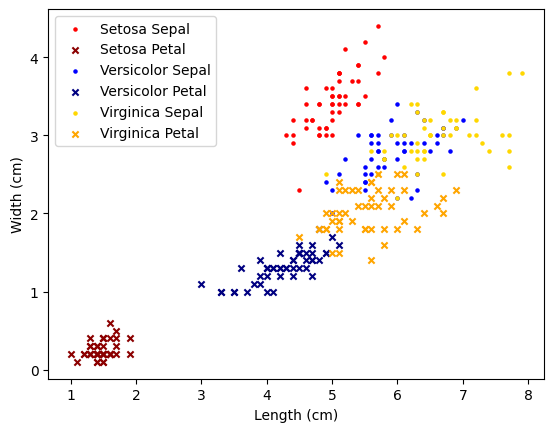

In [29]:
#Scatterplot
# define plot parameters - 
# come back to this because i should be able to run this in a for loop to select the different species names automatically from Unique Species array. 
colors = ['r','g','b','y', ]
ax7=df1.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', marker = '.', c = 'red' , label = 'Setosa Sepal')
ax8=df1.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', marker = 'x', c = 'darkred', label = 'Setosa Petal', ax = ax7)
ax9=df2.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', marker = '.', c = 'blue' , label = 'Versicolor Sepal',ax = ax7)
ax10=df2.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', marker = 'x', c = 'navy', label = 'Versicolor Petal', ax = ax7)
ax11=df3.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', marker = '.', c = 'gold' , label = 'Virginica Sepal',ax = ax7)
ax12=df3.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', marker = 'x', c = 'orange', label = 'Virginica Petal', ax = ax7, legend =True)

# define plot labels
ax7.set_xlabel('Length (cm)')
ax7.set_ylabel('Width (cm)')

# command to show plot 
pt.savefig('scatterplotSummaryWithoutRegression.png')
pt.show()

## Task 6: Analyze Relationship

Use numpy.polyfit to add a regression line to the scatter plot from Task 5.

0.7985283006471534 -0.5694326730396492
0.20124509405873603 -0.04822032751387205
0.31971934554813447 0.8721459648262744
0.3310536044362293 -0.08428835489833601
0.23189049503351336 1.4463054187192137
0.16029695540308708 1.1360313036020602


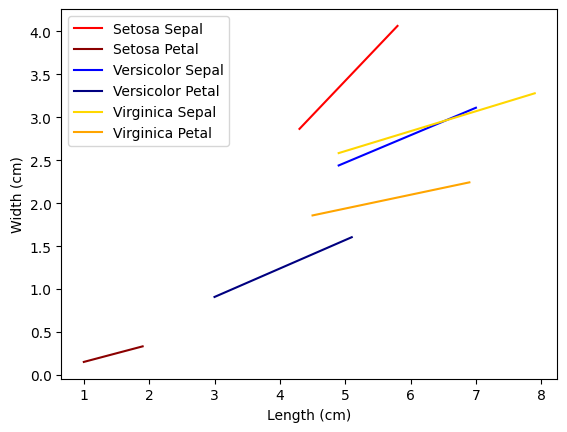

In [30]:


#calculate the straight line best fits for each dataset pair
b1, a1 = np.polyfit(df1['sepal length (cm)'], df1['sepal width (cm)'], deg=1)
b2, a2 = np.polyfit(df1['petal length (cm)'], df1['petal width (cm)'], deg=1)
b3, a3 = np.polyfit(df2['sepal length (cm)'], df2['sepal width (cm)'], deg=1)
b4, a4 = np.polyfit(df2['petal length (cm)'], df2['petal width (cm)'], deg=1)
b5, a5 = np.polyfit(df3['sepal length (cm)'], df3['sepal width (cm)'], deg=1)
b6, a6 = np.polyfit(df3['petal length (cm)'], df3['petal width (cm)'], deg=1)

# set upper and lower limits for lines to start and finish at 
xseq1 = np.linspace(min(df1['sepal length (cm)']), max(df1['sepal length (cm)']), num=100)
xseq2 = np.linspace(min(df1['petal length (cm)']), max(df1['petal length (cm)']), num=100)
xseq3 = np.linspace(min(df2['sepal length (cm)']), max(df2['sepal length (cm)']), num=100)
xseq4 = np.linspace(min(df2['petal length (cm)']), max(df2['petal length (cm)']), num=100)
xseq5 = np.linspace(min(df3['sepal length (cm)']), max(df3['sepal length (cm)']), num=100)
xseq6 = np.linspace(min(df3['petal length (cm)']), max(df3['petal length (cm)']), num=100)

#print a & b pairs for each pair

print(b1,a1)
print(b2,a2)
print(b3,a3)
print(b4,a4)
print(b5,a5)
print(b6,a6)


# add straight line regression lines to each scatterplot pair
ax22 = pt.subplot(111)
lines22 = ax22.plot(xseq1, a1 + b1 * xseq1, c = 'red', label = 'Setosa Sepal')
ax23=pt.plot(xseq2, a2 + b2 * xseq2, c = 'darkred', label = 'Setosa Petal')
ax24=pt.plot(xseq3, a3 + b3 * xseq3, c = 'blue' , label = 'Versicolor Sepal')
ax25=pt.plot(xseq4, a4 + b4 * xseq4, c = 'navy', label = 'Versicolor Petal')
ax26=pt.plot(xseq5, a5 + b5 * xseq5, c = 'gold' , label = 'Virginica Sepal')
ax27=pt.plot(xseq6, a6 + b6 * xseq6, c = 'orange', label = 'Virginica Petal')

#define plot label
ax22.set_xlabel('Length (cm)')
ax22.set_ylabel('Width (cm)')
ax22.legend()

# command to show plot 
pt.savefig('scatterplotSummaryWithRegression.png')
pt.show()

## Task 7: Analyze Class Distributions

Create box-plots of the petal lengths for each of the three classes.

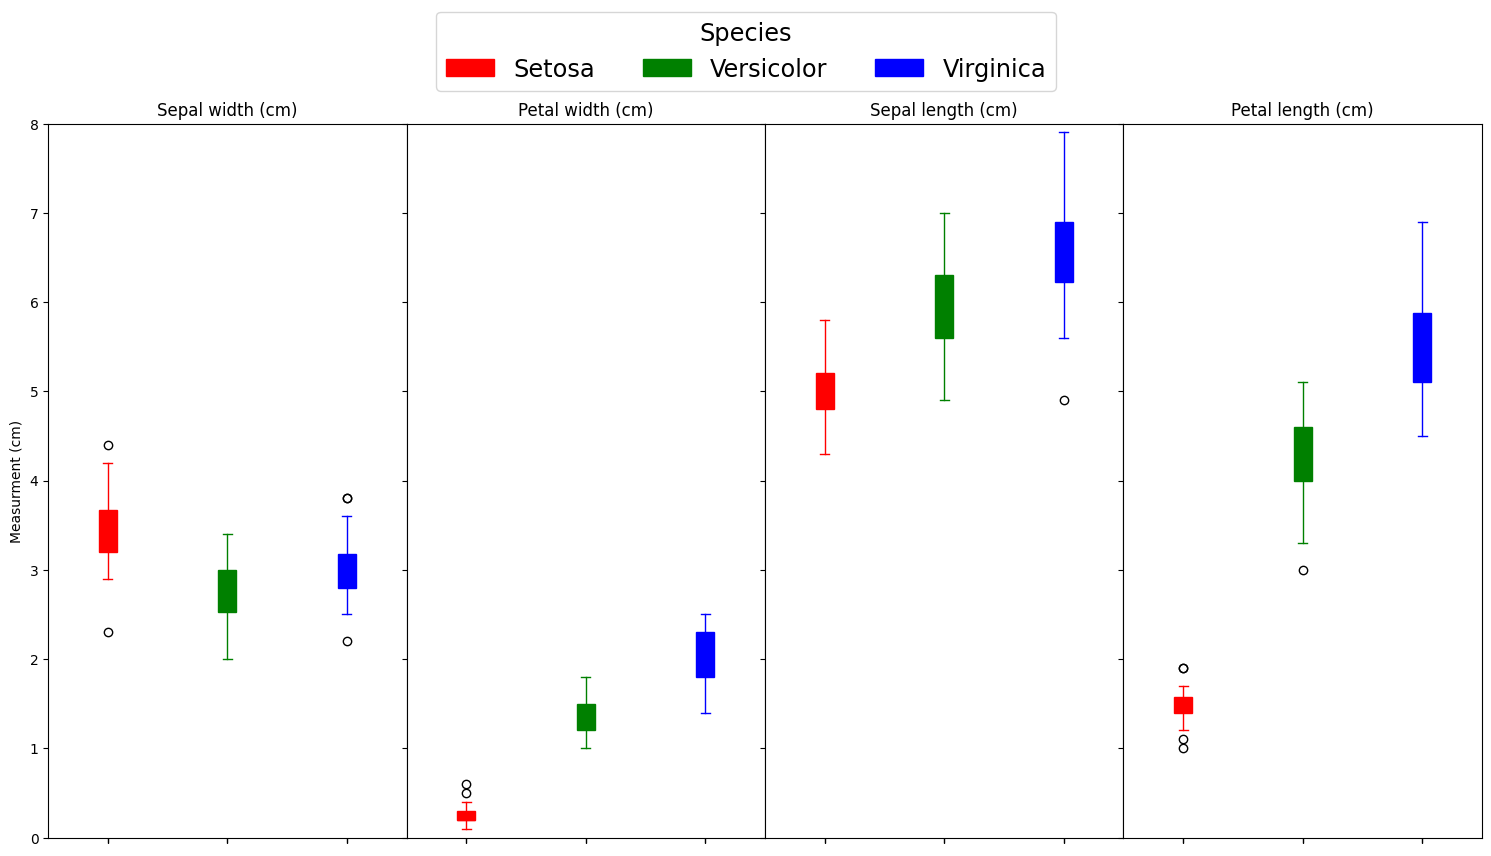

In [31]:
# Boxplots - show a variable's mean & spread for each species, makes for easy visual comparisons 
# I will display these as a 2x2 subplot to make visualising these easier. 
# Boxplot for Sepal Width
fig, axes = pt.subplots(nrows=1, ncols=4, sharex = True, sharey = True)

ax122 = df1.plot(kind = 'box', column = ["sepal width (cm)"], positions = [1] , title = 'Sepal width (cm)', ylabel = 'Measurment (cm)', patch_artist=True, color = 'red', ax=axes[0] )
ax123 = df2.plot(kind = 'box', column = ["sepal width (cm)"], positions = [2] , patch_artist=True, color = 'green', ax = ax122)
ax124 = df3.plot(kind = 'box', column = ["sepal width (cm)"], positions = [3] , patch_artist=True, color = 'blue', ax = ax122 )
ax122.set_ylim(0.0, 8.0)
ax122.tick_params(axis='x', rotation=90)

# Boxplot for Petal Width
ax125 = df1.plot(kind = 'box', column = ["petal width (cm)"], positions = [1] , title = 'Petal width (cm)',  ylabel = 'Measurment (cm)', patch_artist=True, color = 'red',ax=axes[1] )
ax126 = df2.plot(kind = 'box', column = ["petal width (cm)"], positions = [2] , patch_artist=True, color = 'green', ax = ax125)
ax127 = df3.plot(kind = 'box', column = ["petal width (cm)"], positions = [3] , patch_artist=True, color = 'blue', ax = ax125 )
ax125.set_ylim(0.0, 8.0)
ax125.tick_params(axis='x', rotation=90)

# Boxplot for Sepal Length
ax128 = df1.plot(kind = 'box', column = ["sepal length (cm)"], positions = [1] , title = 'Sepal length (cm)', ylabel = 'Measurment (cm)', patch_artist=True, color = 'red', ax=axes[2] )
ax129 = df2.plot(kind = 'box', column = ["sepal length (cm)"], positions = [2] , patch_artist=True, color = 'green', ax = ax128)
ax130 = df3.plot(kind = 'box', column = ["sepal length (cm)"], positions = [3] , patch_artist=True, color = 'blue', ax = ax128)
ax128.set_ylim(0.0, 8.0)
ax128.tick_params(axis='x', rotation=90)


# Boxplot for Petal Length
ax131 = df1.plot(kind = 'box', column = ["petal length (cm)"], positions = [1] , title = 'Petal length (cm)', ylabel = 'Measurment (cm)', patch_artist=True, color = 'red', ax=axes[3] )
ax132 = df2.plot(kind = 'box', column = ["petal length (cm)"], positions = [2] , patch_artist=True, color = 'green', ax = ax131)
ax133 = df3.plot(kind = 'box', column = ["petal length (cm)"], positions = [3] , patch_artist=True, color = 'blue', ax = ax131)
ax131.set_ylim(0.0, 8.0)
ax131.tick_params(axis='x', rotation=90)

# Define the plot labels & Legend
boxplotLabels = ['Setosa','Versicolor','Virginica']
fig.legend(labels=boxplotLabels, loc = 'upper center',ncols=3, title = 'Species', title_fontsize = 'xx-large', fontsize = 'xx-large')

# Remove the x-axis labels as that information is in the legend
ax122.tick_params('x', labelbottom=False)
ax125.tick_params('x', labelbottom=False)
ax128.tick_params('x', labelbottom=False)
ax131.tick_params('x', labelbottom=False)

#adjust the spacing of the plot
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(wspace=0.0)

#set image size
fig.set_size_inches(18.5, 10.5)

pt.savefig('SubplotBoxplots.png')
pt.show()

## Task 8: Compute Correlations

Calculate the correlation coefficients between the features.
Display the results as a heatmap using matplotlib.

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width (cm)            0.278098          0.232752           0.331630   

                   petal width (cm)  
sepal length (cm)          0.278098  
sepal width (cm)           0.232752  
petal length (cm)          0.331630  
petal width (cm)           1.000000  
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)           0.754049          0.560522           1.000000   
petal width (cm)            0.546461          0.663999           0.786668   

                   petal width (cm)  


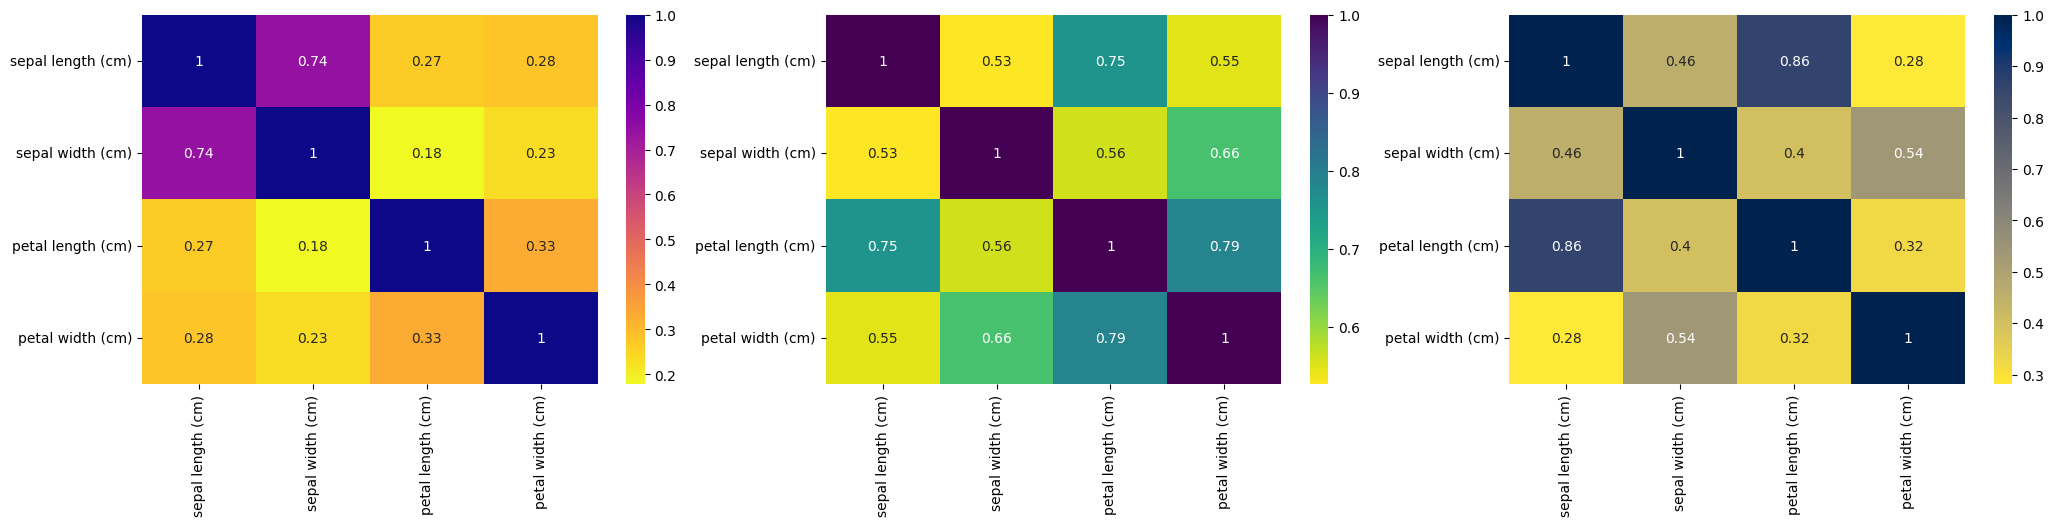

In [32]:
# Compute correlation matrix
co_mtx1 = df1.corr(numeric_only=True)
co_mtx2 = df2.corr(numeric_only=True)
co_mtx3 = df3.corr(numeric_only=True)

# Print correlation matrix
print(co_mtx1)
print(co_mtx2)
print(co_mtx3)

# setup subplots
#fig, axes = pt.subplots(nrows=1, ncols=3, sharex = False, sharey = True)

# Plot correlation heatmap, 1 row, 3 columns
fig = pt.figure()
fig.set_figwidth(25)
ax50 =  fig.add_subplot(131)
ax51 =  fig.add_subplot(132)
ax52 =  fig.add_subplot(133)

sns.heatmap(co_mtx1, cmap="plasma_r", annot=True, ax=ax50)
sns.heatmap(co_mtx2, cmap="viridis_r", annot=True, ax=ax51)
sns.heatmap(co_mtx3, cmap="cividis_r", annot=True, ax=ax52)

#ax50 = sns.heatmap(co_mtx1, cmap="YlGnBu", annot=True)
#ax51 = sns.heatmap(co_mtx2, cmap="viridis", annot=True)
#ax52 = sns.heatmap(co_mtx3, cmap="inferno", annot=True)


# Display heatmap
ax50.set_title = ("Setosa")
ax51.set_title = ("Versicolor")
ax52.set_title = ("Virginica")
#pt.legend()
pt.show()

## Task 9: Fit a Simple Linear Regression

For your two features in Task 5, calculate the coefficient of determination R <sup>2</sup>.
Re-create the plot from Task 6 and annotate it with the R<sup>2</sup> value.

     Slopes  Intercepts  R Values      P Values  Standard Errors
0  0.798528   -0.569433  0.742547  6.709843e-10         0.103965
1  0.201245   -0.048220  0.331630  1.863892e-02         0.082633
2  0.319719    0.872146  0.525911  8.771860e-05         0.074633
3  0.331054   -0.084288  0.786668  1.271916e-11         0.037500
4  0.231890    1.446305  0.457228  8.434625e-04         0.065103
5  0.160297    1.136031  0.322108  2.253577e-02         0.068001




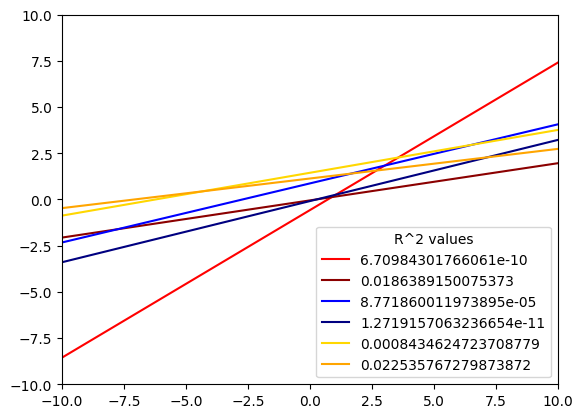

In [134]:
# define the slopes, intercepts, r values, P values, and standard errors for each of the 6 groups of x-y pairings 
# intercept is vlaue of Y when X is zero (point ot which the line crosses x axis)
slope1, intercept1, r_value1, p_value1, std_err1 = sp.stats.linregress(df1.iloc[:, 0], df1.iloc[:, 1])          # Setosa Sepal      x,y pairings
slope2, intercept2, r_value2, p_value2, std_err2 = sp.stats.linregress(df1.iloc[:, 2], df1.iloc[:, 3])          # Setosa Petal      x,y pairings
slope3, intercept3, r_value3, p_value3, std_err3 = sp.stats.linregress(df2.iloc[:, 0], df2.iloc[:, 1])          # Versicolor Sepal  x,y pairings 
slope4, intercept4, r_value4, p_value4, std_err4 = sp.stats.linregress(df2.iloc[:, 2], df2.iloc[:, 3])          # Versicolor Petal  x,y pairings 
slope5, intercept5, r_value5, p_value5, std_err5 = sp.stats.linregress(df3.iloc[:, 0], df3.iloc[:, 1])          # Virginica Sepal   x,y pairings
slope6, intercept6, r_value6, p_value6, std_err6 = sp.stats.linregress(df3.iloc[:, 2], df3.iloc[:, 3])          # Virginica Petal   x,y pairings

# populate these into grouped arrays
slopes =        [slope1, slope2, slope3, slope4, slope5, slope6]
intercepts =    [intercept1, intercept2, intercept3, intercept4, intercept5, intercept6]
r_values =      [r_value1, r_value2, r_value3, r_value4, r_value5, r_value6 ]
p_values =      [p_value1, p_value2, p_value3, p_value4, p_value5, p_value6 ]
std_errs =      [std_err1, std_err2, std_err3, std_err4, std_err5, std_err6 ]

# write groups into a dataframe 
coefficients = pd.DataFrame(data = list(zip(slopes, intercepts,  r_values,  p_values, std_errs)),columns= ["Slopes", "Intercepts", "R Values", "P Values", "Standard Errors"])

# print out the dataframe. 
print (coefficients)
print("\n")


# create the plot 
# setup the plot area to contain 6 lines
ax = pt.gca()
ax.set_ylim([-10, 10])
ax.set_xlim([-10, 10])

# defiene the lines
#        SYNTAX for points: (xy1, xy2=None, *, slope=None, **kwargs))

line1 = pt.axline(xy1=[0, coefficients.iloc[0,1]], slope=coefficients.iloc[0,0], clip_on = True, label = coefficients.iloc[0,3], color = 'red', ) 
line2 = pt.axline(xy1=[0, coefficients.iloc[1,1]], slope=coefficients.iloc[1,0], label = coefficients.iloc[1,3], color = 'darkred') 
line3 = pt.axline(xy1=[0, coefficients.iloc[2,1]], slope=coefficients.iloc[2,0], label = coefficients.iloc[2,3],color = 'blue') 
line4 = pt.axline(xy1=[0, coefficients.iloc[3,1]], slope=coefficients.iloc[3,0], label = coefficients.iloc[3,3],color = 'navy') 
line5 = pt.axline(xy1=[0, coefficients.iloc[4,1]], slope=coefficients.iloc[4,0], label = coefficients.iloc[4,3],color = 'gold') 
line6 = pt.axline(xy1=[0, coefficients.iloc[5,1]], slope=coefficients.iloc[5,0], label = coefficients.iloc[5,3],color = 'orange') 
'''
line1 = pt.scatter(xy1=[0, coefficients.iloc[0,1]], slope=coefficients.iloc[0,0], label = coefficients.iloc[0,3], color = 'red', ) 
line2 = pt.scatter(xy1=[0, coefficients.iloc[1,1]], slope=coefficients.iloc[1,0], label = coefficients.iloc[1,3], color = 'darkred') 
line3 = pt.scatter(xy1=[0, coefficients.iloc[2,1]], slope=coefficients.iloc[2,0], label = coefficients.iloc[2,3], color = 'blue') 
line4 = pt.scatter(xy1=[0, coefficients.iloc[3,1]], slope=coefficients.iloc[3,0], label = coefficients.iloc[3,3], color = 'navy') 
line5 = pt.scatter(xy1=[0, coefficients.iloc[4,1]], slope=coefficients.iloc[4,0], label = coefficients.iloc[4,3], color = 'gold') 
line6 = pt.scatter(xy1=[0, coefficients.iloc[5,1]], slope=coefficients.iloc[5,0], label = coefficients.iloc[5,3], color = 'orange') 
'''
legend = pt.legend(title="R^2 values", loc= 'lower right')
pt.show()

## Task 10: Too Many Features

Use seaborn to create a pairplot of the data set.
Explain, in your own words, what the pairplot depicts.

## End